100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.75it/s]


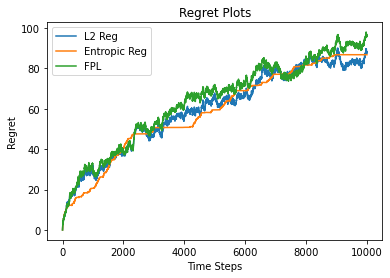

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from decimal import Decimal


class FTRL_L2:
    def __init__(self, d, eta,keep_R=False):
        self.d = d
        self.t=0
        self.eta=eta
        self.w = self.projectSimplex(np.zeros(d))
        self.keep_R = keep_R
        self.total_loss_expert = np.zeros(d)
        self.total_loss = 0
        # bounds
        self.L=np.sqrt(self.d)
        if(self.keep_R):
            self.L = np.sqrt(self.d*(1+(1/self.eta)))
        self.B=1

        # self.eta=self.B/(self.L*np.sqrt(2*z.shape[0]))
        
        self.regret=[0]
        # self.regret=[1/(2*eta)]
        self.mistake=[]
        self.R = np.random.random(self.d)*(1/self.eta)
        
    def projectSimplex(self, y):
#         return y
        m = len(y)
        bget=False
        s = sorted(y)[::-1]
        tmpsum=0

        for i in range(0,m-1):
            tmpsum = tmpsum + s[i]
            tmax = (tmpsum - 1)/(i+1)
            if tmax>=s[i+1]:
                bget=True
                break
        if(not bget):
            tmax = (tmpsum+s[m-1]-1)/m
        mask = y-tmax>=0.0
        return (y-tmax)*mask

    def update(self,zt, keep_R=False):

        self.total_loss = self.total_loss + np.sum(zt*self.w)
        self.total_loss_expert =  self.total_loss_expert + zt
        
        step_regret = self.total_loss -  np.min(self.total_loss_expert)
        
        
        self.w = self.w - self.eta*zt
        self.w = self.projectSimplex(self.w)
        
        self.regret.append(step_regret)

    def weight(self):
        return self.w
    
    def mistakeHistory(self):
        plt.title("Euclid")
        plt.plot(self.regret)
        theoritical = self.L*self.B*np.sqrt(2*np.arange(len(self.regret)))
        # plt.plot(theoritical, 'k')
        plt.show()
    
    def return_regret(self):
        return self.regret
    
    def reset_weight(self):
        self.w = self.projectSimplex(np.zeros(self.d))
        self.R = np.random.random(self.d)*(1/self.eta)

class FTRL_FPL:
    def __init__(self, d, eta):
        self.d = d
        self.t=0
        self.eta=eta
        self.w = np.ones(d)*(1/d)
        
        self.total_loss_expert = np.zeros(d)
        self.total_pred_expert = np.zeros(d)
        self.total_loss = 0
        # bounds
        self.L=np.sqrt(self.d)
        self.B=1

        # self.eta=self.B/(self.L*np.sqrt(2*z.shape[0]))
        
        self.regret=[0]
        # self.regret=[1/(2*eta)]
        self.mistake=[]
        self.R = np.random.random(self.d)*(1/self.eta)

    def update(self,zt, keep_R=False):
        
        self.total_loss = self.total_loss + np.sum(zt*self.w)
        self.total_loss_expert =  self.total_loss_expert + zt 
        self.total_pred_expert = self.total_pred_expert  + zt + self.R
        
        
        step_regret = self.total_loss -  np.min(self.total_loss_expert)
        
        self.w = np.zeros_like(self.w)
        self.w[np.argmin(self.total_pred_expert)]=1.0
        
        self.regret.append(step_regret)
        self.t=self.t+1

    def weight(self):
        return self.w
    
    def mistakeHistory(self):
        plt.title("Euclid")
        plt.plot(self.regret)
        theoritical = self.L*self.B*np.sqrt(2*np.arange(len(self.regret)))
        # plt.plot(theoritical, 'k')
        plt.show()
    
    def return_regret(self):
        return self.regret
    
    def reset_weight(self):
        self.w = self.projectSimplex(np.zeros(self.d))
        self.R = np.random.random(self.d)*(1/self.eta)


class FTRL_Entropy:
    def __init__(self, d, eta, keep_R=False):
        self.keep_R = keep_R
        self.d = d
        self.t=0
        self.eta=eta
        self.w = np.ones(d)*(1/d)
        self.regret=[0]
        # self.regret=[np.log(d)/self.eta]
        # print (self.regret)
        self.total_loss_expert = np.zeros(d)
        self.total_loss = 0
        
        self.mistake=[]
        self.R = np.random.random(self.d)*(1/self.eta)
        
        self.L = 1
        if(self.keep_R):
            self.L = 1 + 1/self.eta
        self.B = 1

    def update(self,zt):
        
        if(self.keep_R):
            zt = zt + self.R
        w_prev = self.w
        
        # exp_z = np.exp(-self.eta*zt)
        # self.w = (self.w * exp_z) /np.sum(self.w*exp_z)
        
        
        self.total_loss = self.total_loss + np.sum(zt*self.w)

        self.total_loss_expert = self.total_loss_expert + zt
        # print (self.total_loss, "\t", np.min(self.total_loss_expert))
        
        # step_regret = zt.dot(w_prev - self.w)
        step_regret = self.total_loss - np.min(self.total_loss_expert)
        
        exp_z = np.exp(-self.eta*zt)
        self.w = (self.w * exp_z) /np.sum(self.w*exp_z)
        
        # print (step_regret)
        self.regret.append(step_regret)

    def weight(self):
        return self.w
    
    def mistakeHistory(self,B=1,L=1):
        plt.plot(self.regret)
        theoritical = np.sqrt(2*np.log(self.d)*np.arange(len(self.regret)))
        
        theoritical = self.L*self.B*np.sqrt(2*np.log(self.d)*np.arange(len(self.regret)))
        # plt.plot(theoritical, 'k')
        plt.show()

    def return_regret(self):
        return self.regret
    
    def reset_weight(self):
        self.w = np.ones(self.d)*(1/self.d)
        self.R = np.random.random(self.d)*(1/self.eta)


class RunExperiment:
    def __init__(self, z, ch=0, eps=0, keep_R=False):
        self.z=z
        self.ch=ch
        self.eps=eps
        self.d = self.z.shape[1]
        self.keep_R=keep_R

        if(self.ch==0):
            self.algo=FTRL_L2(self.d,self.eps,self.keep_R)
        elif(self.ch==1):
            self.algo=FTRL_Entropy(self.d,self.eps,self.keep_R)
        elif(self.ch==2):
            self.algo=FTRL_FPL(self.d,self.eps)
    
    def run(self):
        for zt in self.z:
            self.algo.update(zt)
    
    def mistakeHistory(self):
        return self.algo.mistakeHistory()
    
    def return_regret(self):
        return self.algo.return_regret()

if __name__=='__main__':
    z=np.loadtxt("./Datasets/Dataset2_Z.txt",delimiter=',')
    
    eta1 = 1/(1*np.sqrt(2*z.shape[0]))
    ch=0
    # eta1 = np.sqrt(np.log(z.shape[1]))/(1*np.sqrt(2*z.shape[0]))
    # eta1 = np.sqrt(2)/(np.sqrt(z.shape[1]*z.shape[0]))
    p1 = RunExperiment(z,ch,eta1,False)
    p1.run()
    p1_eta = p1.return_regret()
    eta2 = np.sqrt(np.log(z.shape[1]))/(1*np.sqrt(2*z.shape[0]))
    # eta = 1/(1*np.sqrt(2*z.shape[0]))
    p2 = RunExperiment(z,1,100*eta2,False)
    
    
    # eta = np.sqrt(np.log(z.shape[1]))/(1*np.sqrt(2*z.shape[0]))
    # p2 = RunExperiment(z,1,eta,True)
    
    # p1.run()
    p2.run()
    
    p1_r = p1.return_regret()
    p2_r = p2.return_regret()
    
    p3_r_eff = []
    for i in tqdm(range(10)):
        eta3 = 100*np.sqrt(2)/(np.sqrt(z.shape[1]*z.shape[0]))
        p3 = RunExperiment(z,2,eta3)
        p3.run()
        p3_r_eff.append(p3.return_regret())
    
    p3_r = np.mean(p3_r_eff, axis=0)
    plt.title("Regret Plots")

    plt.plot(p1_r, label='L2 Reg')
    plt.plot(p2_r, label='Entropic Reg')
    plt.plot(p3_r, label='FPL')
    
    plt.xlabel('Time Steps')
    plt.ylabel('Regret')
    
    plt.legend(loc='best')
    plt.show()
    # P_mistakes = p1.mistakeHistory()
    

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.93it/s]


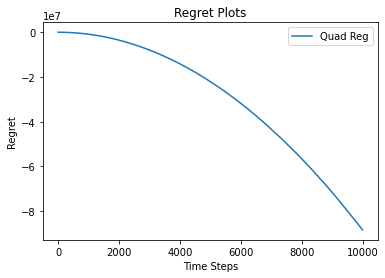

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from decimal import Decimal


class FTRL_L2:
    def __init__(self, d, eta,keep_R=False):
        self.d = d
        self.t=0
        self.eta=eta
        self.w = np.ones(d)*(1/d) #self.projectSimplex(np.zeros(d))
        self.keep_R = keep_R
        self.total_loss_expert = np.zeros(d)
        self.total_loss = 0
        # bounds
        self.L=np.sqrt(self.d)
        if(self.keep_R):
            self.L = np.sqrt(self.d*(1+(1/self.eta)))
        self.B=1

        # self.eta=self.B/(self.L*np.sqrt(2*z.shape[0]))
        
        self.regret=[0]
        # self.regret=[1/(2*eta)]
        self.mistake=[]
        self.R = np.random.random(self.d)*(1/self.eta)
        
#     def projectSimplex(self, y):
#         m = len(y)
#         bget=False
#         s = sorted(y)[::-1]
#         tmpsum=0

#         for i in range(0,m-1):
#             tmpsum = tmpsum + s[i]
#             tmax = (tmpsum - 1)/(i+1)
#             if tmax>=s[i+1]:
#                 bget=True
#                 break
#         if(not bget):
#             tmax = (tmpsum+s[m-1]-1)/m
#         mask = y-tmax>=0.0
#         return (y-tmax)*mask

    def update(self,zt, keep_R=False):

        self.total_loss = self.total_loss + np.sum(zt*self.w)
        self.total_loss_expert =  self.total_loss_expert + zt
        
        step_regret = self.total_loss -  np.min(self.total_loss_expert)
        
        
        self.w = self.w - self.eta*zt
#         self.w = self.projectSimplex(self.w)
        
        self.regret.append(step_regret)

    def weight(self):
        return self.w
    
    def mistakeHistory(self):
        plt.title("Euclid")
        plt.plot(self.regret)
        theoritical = self.L*self.B*np.sqrt(2*np.arange(len(self.regret)))
        # plt.plot(theoritical, 'k')
        plt.show()
    
    def return_regret(self):
        return self.regret
    
    def reset_weight(self):
#         self.w = self.projectSimplex(np.zeros(self.d))
        self.w = np.ones(d)*(1/d) 
        self.R = np.random.random(self.d)*(1/self.eta)

class FTRL_FPL:
    def __init__(self, d, eta):
        self.d = d
        self.t=0
        self.eta=eta
        self.w = np.ones(d)*(1/d)
        
        self.total_loss_expert = np.zeros(d)
        self.total_pred_expert = np.zeros(d)
        self.total_loss = 0
        # bounds
        self.L=np.sqrt(self.d)
        self.B=1

        # self.eta=self.B/(self.L*np.sqrt(2*z.shape[0]))
        
        self.regret=[0]
        # self.regret=[1/(2*eta)]
        self.mistake=[]
        self.R = np.random.random(self.d)*(1/self.eta)

    def update(self,zt, keep_R=False):
        
        self.total_loss = self.total_loss + np.sum(zt*self.w)
        self.total_loss_expert =  self.total_loss_expert + zt 
        self.total_pred_expert = self.total_pred_expert  + zt + self.R
        
        
        step_regret = self.total_loss -  np.min(self.total_loss_expert)
        
        self.w = np.zeros_like(self.w)
        self.w[np.argmin(self.total_pred_expert)]=1.0
        
        self.regret.append(step_regret)
        self.t=self.t+1

    def weight(self):
        return self.w
    
    def mistakeHistory(self):
        plt.title("Euclid")
        plt.plot(self.regret)
        theoritical = self.L*self.B*np.sqrt(2*np.arange(len(self.regret)))
        # plt.plot(theoritical, 'k')
        plt.show()
    
    def return_regret(self):
        return self.regret
    
    def reset_weight(self):
        self.w = np.ones(d)*(1/d) #self.projectSimplex(np.zeros(self.d))
        self.R = np.random.random(self.d)*(1/self.eta)


class FTRL_Entropy:
    def __init__(self, d, eta, keep_R=False):
        self.keep_R = keep_R
        self.d = d
        self.t=0
        self.eta=eta
        self.w = np.ones(d)*(1/d)
        self.regret=[0]
        # self.regret=[np.log(d)/self.eta]
        # print (self.regret)
        self.total_loss_expert = np.zeros(d)
        self.total_loss = 0
        
        self.mistake=[]
        self.R = np.random.random(self.d)*(1/self.eta)
        
        self.L = 1
        if(self.keep_R):
            self.L = 1 + 1/self.eta
        self.B = 1

    def update(self,zt):
        
        if(self.keep_R):
            zt = zt + self.R
        w_prev = self.w
        
        # exp_z = np.exp(-self.eta*zt)
        # self.w = (self.w * exp_z) /np.sum(self.w*exp_z)
        
        
        self.total_loss = self.total_loss + np.sum(zt*self.w)

        self.total_loss_expert = self.total_loss_expert + zt
        # print (self.total_loss, "\t", np.min(self.total_loss_expert))
        
        # step_regret = zt.dot(w_prev - self.w)
        step_regret = self.total_loss - np.min(self.total_loss_expert)
        
        exp_z = np.exp(-self.eta*zt)
        self.w = (self.w * exp_z) /np.sum(self.w*exp_z)
        
        # print (step_regret)
        self.regret.append(step_regret)

    def weight(self):
        return self.w
    
    def mistakeHistory(self,B=1,L=1):
        plt.plot(self.regret)
        theoritical = np.sqrt(2*np.log(self.d)*np.arange(len(self.regret)))
        
        theoritical = self.L*self.B*np.sqrt(2*np.log(self.d)*np.arange(len(self.regret)))
        # plt.plot(theoritical, 'k')
        plt.show()

    def return_regret(self):
        return self.regret
    
    def reset_weight(self):
        self.w = np.ones(self.d)*(1/self.d)
        self.R = np.random.random(self.d)*(1/self.eta)


class RunExperiment:
    def __init__(self, z, ch=0, eps=0, keep_R=False):
        self.z=z
        self.ch=ch
        self.eps=eps
        self.d = self.z.shape[1]
        self.keep_R=keep_R

        if(self.ch==0):
            self.algo=FTRL_L2(self.d,self.eps,self.keep_R)
        elif(self.ch==1):
            self.algo=FTRL_Entropy(self.d,self.eps,self.keep_R)
        elif(self.ch==2):
            self.algo=FTRL_FPL(self.d,self.eps)
    
    def run(self):
        for zt in self.z:
            self.algo.update(zt)
    
    def mistakeHistory(self):
        return self.algo.mistakeHistory()
    
    def return_regret(self):
        return self.algo.return_regret()

if __name__=='__main__':
    z=np.loadtxt("./Datasets/Dataset2_Z.txt",delimiter=',')
    
    eta1 = 1/(1*np.sqrt(2*z.shape[0]))
    ch=0
    # eta1 = np.sqrt(np.log(z.shape[1]))/(1*np.sqrt(2*z.shape[0]))
    # eta1 = np.sqrt(2)/(np.sqrt(z.shape[1]*z.shape[0]))
    p1 = RunExperiment(z,ch,eta1,False)
    p1.run()
    p1_eta = p1.return_regret()
    eta2 = np.sqrt(np.log(z.shape[1]))/(1*np.sqrt(2*z.shape[0]))
    # eta = 1/(1*np.sqrt(2*z.shape[0]))
    p2 = RunExperiment(z,1,100*eta2,False)
    
    
    # eta = np.sqrt(np.log(z.shape[1]))/(1*np.sqrt(2*z.shape[0]))
    # p2 = RunExperiment(z,1,eta,True)
    
    # p1.run()
    p2.run()
    
    p1_r = p1.return_regret()
    p2_r = p2.return_regret()
    
    p3_r_eff = []
    for i in tqdm(range(10)):
        eta3 = 100*np.sqrt(2)/(np.sqrt(z.shape[1]*z.shape[0]))
        p3 = RunExperiment(z,2,eta3)
        p3.run()
        p3_r_eff.append(p3.return_regret())
    
    p3_r = np.mean(p3_r_eff, axis=0)
    plt.title("Regret Plots")

    plt.plot(p1_r, label='Quad Reg')
#     plt.plot(p2_r, label='Entropic Reg')
#     plt.plot(p3_r, label='FPL')
    
    plt.xlabel('Time Steps')
    plt.ylabel('Regret')
    
    plt.legend(loc='best')
    plt.show()
    # P_mistakes = p1.mistakeHistory()
    

In [2]:
class FTRL_quadratic:
    def __init__(self, d, eta,keep_R=False):
        self.d = d
        self.t=0
        self.eta=eta
        self.w = self.projectSimplex(np.zeros(d))
        self.keep_R = keep_R
        self.total_loss_expert = np.zeros(d)
        self.total_loss = 0
        self.L=np.sqrt(self.d)
        if(self.keep_R):
            self.L = np.sqrt(self.d*(1+(1/self.eta)))
        self.B=1        
        self.regret=[0]
        self.mistake=[]
        self.R = np.random.random(self.d)*(1/self.eta)
        
    def projectSimplex(self, y):
        m = len(y)
        bget=False
        s = sorted(y)[::-1]
        tmpsum=0

        for i in range(0,m-1):
            tmpsum = tmpsum + s[i]
            tmax = (tmpsum - 1)/(i+1)
            if tmax>=s[i+1]:
                bget=True
                break
        if(not bget):
            tmax = (tmpsum+s[m-1]-1)/m
        mask = y-tmax>=0.0
        return (y-tmax)*mask

    def update(self,zt, keep_R=False):

        self.total_loss = self.total_loss + np.sum(zt*self.w)
        self.total_loss_expert =  self.total_loss_expert + zt
        
        step_regret = self.total_loss -  np.min(self.total_loss_expert)
        
        
        self.w = self.w - self.eta*zt
        self.w = self.projectSimplex(self.w)
        
        self.regret.append(step_regret)

    def weight(self):
        return self.w
    
    def mistakeHistory(self):
        plt.title("Euclid")
        plt.plot(self.regret)
        theoritical = self.L*self.B*np.sqrt(2*np.arange(len(self.regret)))
        # plt.plot(theoritical, 'k')
        plt.show()
    
    def return_regret(self):
        return self.regret
    
    def reset_weight(self):
        self.w = self.projectSimplex(np.zeros(self.d))
        self.R = np.random.random(self.d)*(1/self.eta)
        
        
        
        

In [3]:
y=np.random.random(20)*(3)

In [4]:
y

array([0.96973004, 1.86677058, 1.26332443, 1.95045644, 2.36482661,
       0.29723252, 2.33865206, 2.16931717, 0.44511455, 0.65646322,
       1.65915104, 0.79702773, 1.09728193, 0.14030923, 1.45577253,
       1.73543975, 0.42476041, 0.63925268, 1.24632025, 1.40955232])

In [5]:
s = sorted(y)[::-1]

In [6]:
s

[2.364826606884866,
 2.338652058509485,
 2.16931717352501,
 1.9504564373767443,
 1.8667705751632195,
 1.7354397522941765,
 1.6591510390104292,
 1.4557725305066735,
 1.4095523166745558,
 1.2633244329870008,
 1.2463202540077458,
 1.0972819264602713,
 0.969730038936106,
 0.7970277257892746,
 0.656463220688486,
 0.6392526799897363,
 0.44511455324211835,
 0.42476040867738585,
 0.29723252244089327,
 0.1403092272885711]

In [7]:
def projectSimplex(y):
        m = len(y)
        bget=False
        s = sorted(y)[::-1]
        tmpsum=0

        for i in range(0,m-1):
            tmpsum = tmpsum + s[i]
            tmax = (tmpsum - 1)/(i+1)
            print([tmpsum,tmax,s[i+1]])
            if tmax>=s[i+1]:
                bget=True
                break
        if(not bget):
            tmax = (tmpsum+s[m-1]-1)/m
        mask = y-tmax>=0.0
        return (y-tmax)*mask

In [8]:
projectSimplex(np.zeros(5))

[0.0, -1.0, 0.0]
[0.0, -0.5, 0.0]
[0.0, -0.3333333333333333, 0.0]
[0.0, -0.25, 0.0]


array([0.2, 0.2, 0.2, 0.2, 0.2])

In [14]:
projectSimplex(np.array([0, 0, 0, 0, 0]))

[0, -1.0, 0]
[0, -0.5, 0]
[0, -0.3333333333333333, 0]
[0, -0.25, 0]


array([0.2, 0.2, 0.2, 0.2, 0.2])